In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
iris = pd.read_csv(r'E:\IrisAnalysis\IRIS_DATASET\IRIS.csv')

# viewing Data

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.shape

(150, 5)

In [6]:
iris.size

750

In [7]:
len(iris.index)

150

In [8]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# indexing dataset

In [9]:
iris.groupby('species')['species'].count()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [10]:
setosa_df = iris[iris.iloc[:,-1]=='Iris-setosa']

In [11]:
len(setosa_df)

50

In [12]:
versicolor_df = iris[iris.iloc[:,-1]=='Iris-versicolor']

In [13]:
len(versicolor_df)

50

In [14]:
virginica_df = iris[iris.iloc[:,-1]=='Iris-virginica']

In [15]:
len(virginica_df)

50

In [16]:
setosa_df['species']="setosa"

In [17]:
versicolor_df['species']="versicolor"

In [18]:
virginica_df['species']="virginica"

In [19]:
len(virginica_df)

50

In [20]:
iris_df = pd.concat([setosa_df, versicolor_df, virginica_df])

In [21]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [23]:
iris_df.index.is_unique

True

In [24]:
iris_df.columns.is_unique

True

In [25]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [27]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# Data Visualization

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

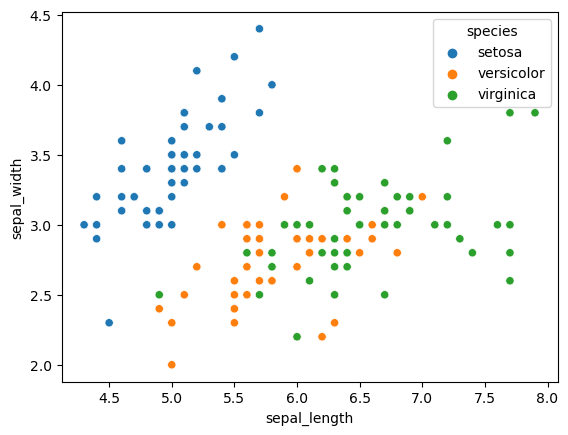

In [28]:
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

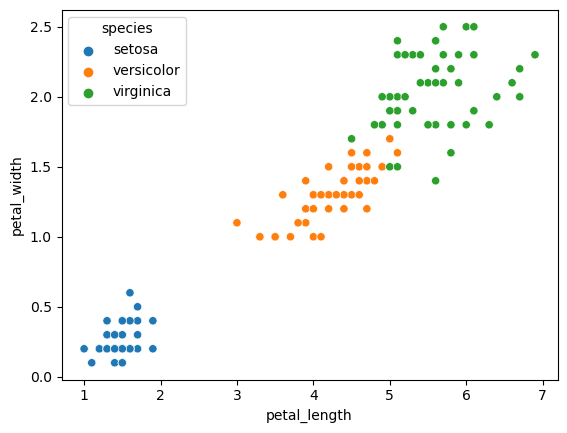

In [29]:
sns.scatterplot(data=iris_df, x='petal_length', y='petal_width', hue='species')

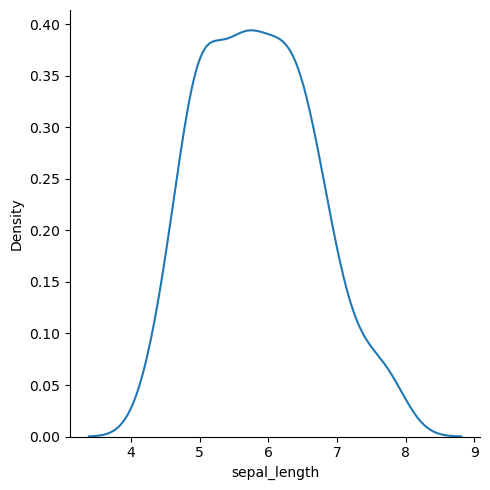

In [30]:
sns.displot(data=iris_df, x='sepal_length', kind='kde')

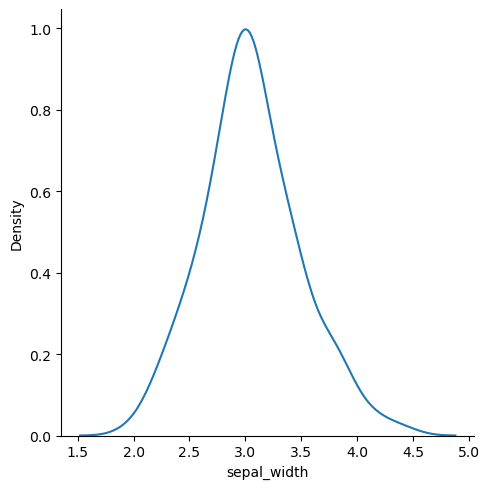

In [31]:
sns.displot(data=iris_df, x='sepal_width', kind='kde')

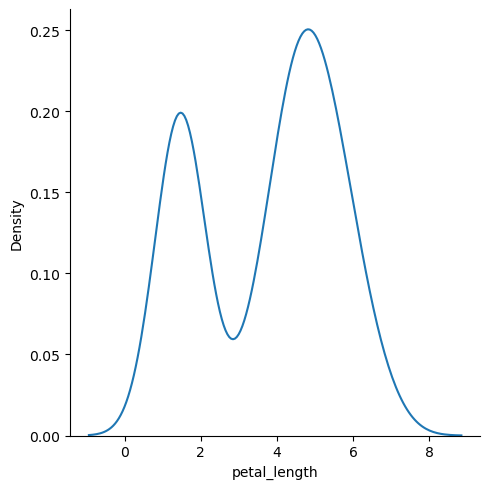

In [32]:
sns.displot(data=iris_df, x='petal_length', kind='kde')

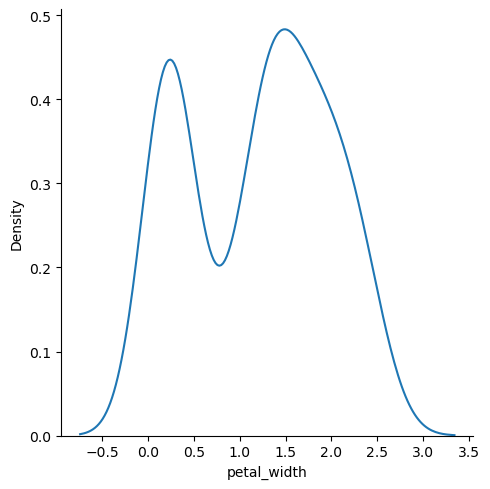

In [33]:
sns.displot(data=iris_df, x='petal_width', kind='kde')

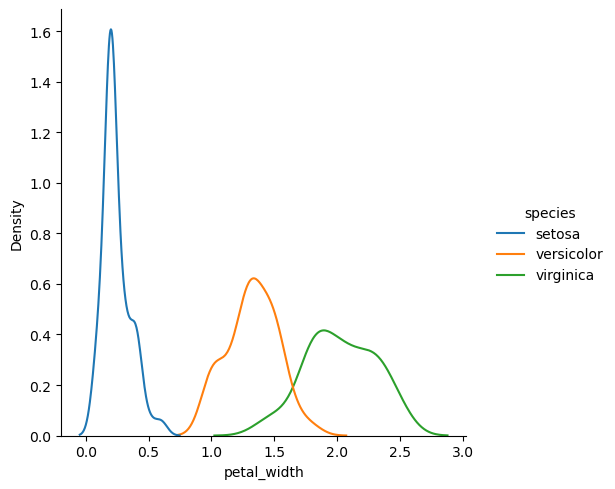

In [34]:
sns.displot(data=iris_df, x='petal_width', hue='species', kind='kde')

# model creation

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
iris_df.replace({
    'species':{
        'setosa':0,
        'versicolor':1,
        'virginica':2
    }
}, inplace=True)

In [41]:
x = iris_df.iloc[:,0:-1]
y = iris_df.iloc[:,-1]

In [48]:
y = pd.DataFrame(data=y)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [55]:
models = LogisticRegression()

In [56]:
models.fit(x_train, y_train)

LogisticRegression()

In [62]:
y_predicted = models.predict(x_test)

In [61]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


In [64]:
score = accuracy_score(y_test, y_predicted)
print(score)

1.0


In [70]:
print(y_predicted[3],y_test.iloc[3,:])

2 species    2
Name: 117, dtype: int64


In [71]:
print(y_predicted[10], y_test.iloc[10,:])

1 species    1
Name: 90, dtype: int64


In [83]:
data = {'y_predicted':y_predicted}
y_predicted_df = pd.DataFrame(data)

In [102]:
y_test_df = y_test.reset_index(drop=True)

In [106]:
prediction = pd.concat([y_test_df, y_predicted_df], axis=1)

In [110]:
prediction.to_csv('prediction', index=False)